In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math
import collections
from fractions import Fraction
import scipy.integrate
from sympy import integrate

In [2]:
def error_r3(f):
    return f**3 + 3*(1 - f) * f**2

In [ ]:
fs = np.linspace(0, 1)

In [ ]:
plt.plot(fs, [error_r3(f) for f in fs])
plt.plot(fs, fs)

In [ ]:
n = 10000
errors = range(int((n+1)/2), n + 1)

In [7]:
probs = [binom.pmf(x, n, .4) for x in errors]

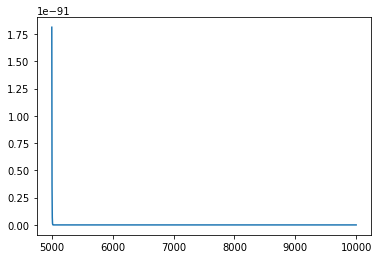

In [8]:
plt.plot(errors, probs)

In [18]:
all_probs = [binom.pmf(x, n, .2) for x in range(1, n + 1)]

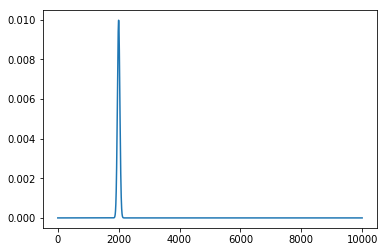

In [19]:
plt.plot(range(1, n + 1), all_probs)

In [4]:
def error_prob(n, f):
    errors = range(int((n+1)/2), n + 1)
    probs = [binom.pmf(x, n, f) for x in errors]
    return sum(probs)

In [5]:
error_prob(3, .1)

0.028000000000000008

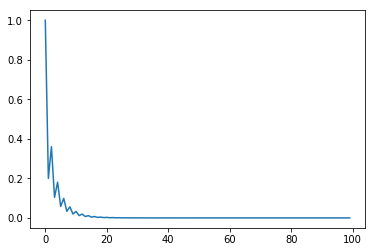

In [22]:
plt.plot(range(100), [error_prob(x, .2) for x in range(100)])

In [15]:
error_prob(70, .2)

2.0547746962292967e-08

In [44]:
n = 1
error = 1
while error > 1e-15:
    error = error_prob(n, .1)
    n += 1
print(n)

64


In [47]:
 64 * (1+(.1 * np.log2(.1) + .9 * np.log2(.9)))

33.984282010286

In [6]:
142*(1+(.2 * np.log2(.2) + .8 * np.log2(.8)))

39.48621052599455

# Ex. 2.4

# Expectation

In [22]:
def expectation(N, f):
    prob = []
    for x in range(0, N + 1):
        prob.append(x*binom.pmf(x, N, f)) 
    return prob

In [30]:
sum(expectation(5, 0.2))

1.0

In [24]:
sum(expectation(400, 0.2))

79.99999999998758

<BarContainer object of 6 artists>

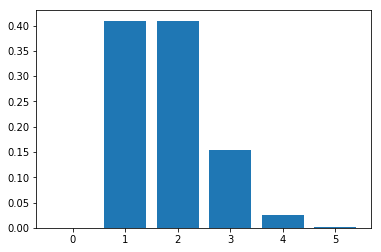

In [26]:
plt.bar(np.arange(len(expectation(5,0.2))), (expectation(5,0.2)))

# Variance and Standard Deviation

In [5]:
def var_desv(N, f):
    res = []
    for x in range(0, N + 1):
        res.append((x**2)*binom.pmf(x, N, f))
    dev = sum(res) - urn(N, f)**2
    
    print ("The Variance is " + str(dev))
    print ("The Standard Deviation is " + str(math.sqrt(dev)))

In [6]:
var_desv(5, 0.2)

The Variance is 0.8
The Standard Deviation is 0.8944271909999159


# Ex. 2.5

In [10]:
trials = []
for i in range(1000):
    trials.append(np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5).sum())
np.mean(trials)

0.968

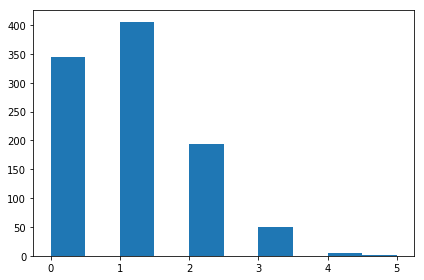

In [11]:
plt.hist(trials)
plt.tight_layout()

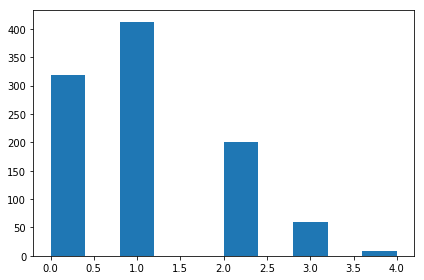

In [12]:
trials_bin = []
for i in range(1000):
    trials_bin.append(np.random.binomial(5, 0.2))
plt.hist(trials_bin)
plt.tight_layout()

In [13]:
def z(N, B, K):
    nb = np.random.choice([1, 0], replace=True, p=[B/K, 1-(B/K)], size=N).sum()
    fb = B/K
    return ((nb - fb*N) ** 2) / (N*fb*(1 - fb))

In [14]:
trials_z = [z(5,1,5) for i in range(10000)]

In [15]:
np.mean(trials_z)

1.01075

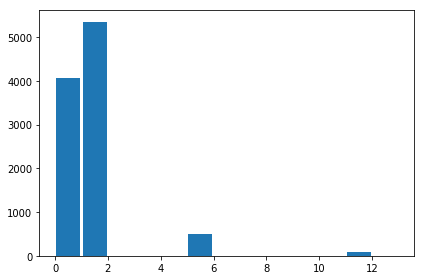

In [16]:
plt.hist(trials_z, bins=range(14), rwidth=0.9)
plt.tight_layout()

In [197]:
4000/10000

0.4

# Ex. 2.6

In [38]:
def urns(N, nb):
    prob = []
    res = []
    for x in range(0, N + 1):
        prob.append(binom.pmf(nb, N, x/10)) 
    for i in range(0, N + 1):   
        res.append((binom.pmf(nb, N, i/10))/(sum(prob)))    
    return res

In [47]:
def probs_urns(N, nb):
    for u in np.arange(0, N + 1):
        print ("Urn", u , "has probability: ", urns(N, nb)[u])

In [48]:
probs = urns(10, 3)

probs_urns(10, 3)

Urn 0 has probability:  0.0
Urn 1 has probability:  0.06307262464852743
Urn 2 has probability:  0.22123978796752994
Urn 3 has probability:  0.29321985989557936
Urn 4 has probability:  0.23625557435790415
Urn 5 has probability:  0.1287785055858141
Urn 6 has probability:  0.04666776777440084
Urn 7 has probability:  0.009892048584565574
Urn 8 has probability:  0.000864217921748162
Urn 9 has probability:  9.61326393057878e-06
Urn 10 has probability:  0.0


Text(0.5, 1.0, 'Probability distribution of urns')

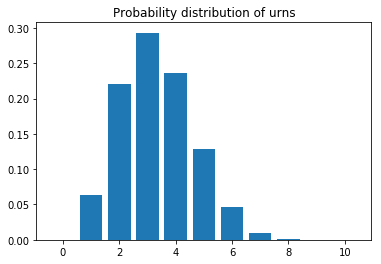

In [50]:
probs = urns(10, 3)
plt.bar(np.arange(0, 11), probs)
plt.title("Probability distribution of urns")

In [695]:
prob = 0
for u in range(11):
    prob += u/10*(probs[u])
print(prob)


0.3330377815118737


# Ex. 2.7

Problem with Beta Integral

In [2]:
def prob_nh_given_fh_N(nh, N, fh):
    return binom.pmf(nh, N, fh)

In [3]:
def priors(u):
    if u == 1:
        return 1    
    else:
        return [4*x for x in np.arange(0, 0.5, 0.01)] + [-4*x + 4 for x in np.arange(0.5, 1, 0.01)]

In [4]:
def prob_nh_given_N(nh, N, u):
    #return np.math.factorial(nh)*np.math.factorial(N-nh)/np.math.factorial(N+1)
    
    return np.trapz([prob_nh_given_fh_N(nh, N, fh) for fh in np.arange(0, 1, 0.01)]*np.array(priors(u)), dx=0.01)

In [5]:
def prob_fh_given_nh_N(nh, N, fh, u):
    return prob_nh_given_fh_N(nh, N, fh) / prob_nh_given_N(nh, N, u)

a) N = 3; nh = 0

    Uniform prior

In [6]:
probs_0_3_U = ([prob_fh_given_nh_N(0, 3, fh, 1) for fh in np.arange(0, 1, 0.01)]) 

    Non-uniform prior

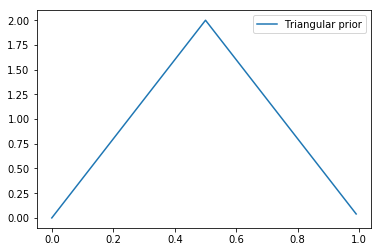

In [7]:
plt.plot(np.arange(0, 1, 0.01), priors(0))
plt.legend(["Triangular prior"])

In [8]:
probs_0_3_NU = np.array([prob_fh_given_nh_N(0, 3, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

Difference between uniform and non-uniform priors:

Text(0.5, 1.0, 'nh=0  N=3')

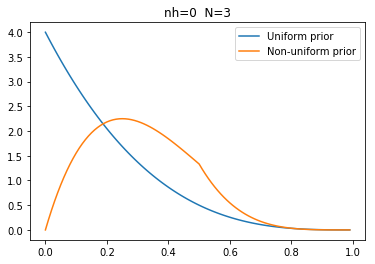

In [9]:
plt.plot(np.arange(0, 1, 0.01), probs_0_3_U)
plt.plot(np.arange(0, 1, 0.01), probs_0_3_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=0  N=3")

Area under both curves:

In [704]:
print("Area under curve for uniform prior: ", np.trapz(np.array(probs_0_3_U), dx=0.01))
print("Area under curve for non-uniform prior: ", np.trapz(np.array(probs_0_3_NU), dx=0.01))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  0.9999999999999999


Probability that the N + 1th outcome will be head:

In [705]:
np.trapz(np.arange(0, 1, 0.01) * probs_0_3_U, dx=0.01)

0.1999466575331798

b) N=3; nh=2

In [706]:
probs_2_3_U =[prob_fh_given_nh_N(2, 3, fh, 1) for fh in np.arange(0, 1, 0.01)] * np.array(priors(1)) 

In [707]:
probs_2_3_NU = np.array([prob_fh_given_nh_N(2, 3, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

Text(0.5, 1.0, 'nh=2  N=3')

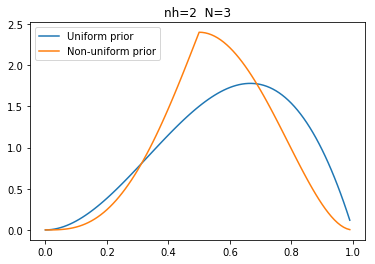

In [708]:
plt.plot(np.arange(0, 1, 0.01), probs_2_3_U)
plt.plot(np.arange(0, 1, 0.01), probs_2_3_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=2  N=3")

In [709]:
print("Area under curve for uniform prior: ", np.trapz(np.array(probs_2_3_U), dx=0.01))
print("Area under curve for non-uniform prior: ", np.trapz(np.array(probs_2_3_NU), dx=0.01))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  1.0000000000000002


Probability that the N + 1th outcome will be head:

In [710]:
np.trapz(np.arange(0, 1, 0.01) * probs_2_3_U, dx=0.01)

0.5997304751507321

c) N=10; nh=3

In [721]:
probs_3_10_U =[prob_fh_given_nh_N(3, 10, fh, 1) for fh in np.arange(0, 1, 0.01)] * np.array(priors(1)) 

In [722]:
probs_3_10_NU = np.array([prob_fh_given_nh_N(3, 10, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

Text(0.5, 1.0, 'nh=3  N=10')

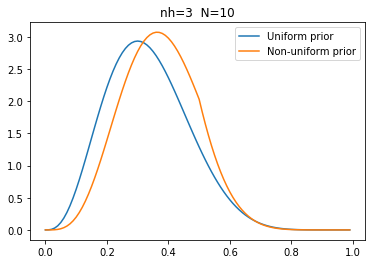

In [723]:
plt.plot(np.arange(0, 1, 0.01), probs_3_10_U)
plt.plot(np.arange(0, 1, 0.01), probs_3_10_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=3  N=10")

In [724]:
print("Area under curve for uniform prior: ", np.trapz(np.array(probs_3_10_U), dx=0.01))
print("Area under curve for non-uniform prior: ", np.trapz(np.array(probs_3_10_NU), dx=0.01))

Area under curve for uniform prior:  1.0000000000000002
Area under curve for non-uniform prior:  1.0


Probability that the N + 1th outcome will be head:

In [725]:
np.trapz(np.arange(0, 1, 0.01) * probs_3_10_U, dx=0.01)

0.3333332967399367


d) N=300; nh=29

In [736]:
probs_29_300_U =[prob_fh_given_nh_N(29, 300, fh, 1) for fh in np.arange(0, 1, 0.01)] * np.array(priors(1)) 

In [737]:
probs_29_300_NU = np.array([prob_fh_given_nh_N(29, 300, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

Text(0.5, 1.0, 'nh=29  N=300')

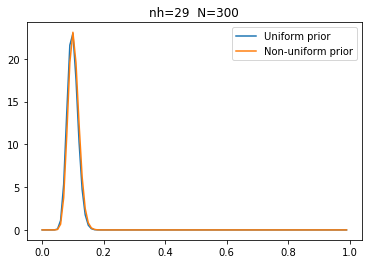

In [738]:
plt.plot(np.arange(0, 1, 0.01), probs_29_300_U)
plt.plot(np.arange(0, 1, 0.01), probs_29_300_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=29  N=300")

In [739]:
print("Area under curve for uniform prior: ", np.trapz(np.array(probs_29_100_U), dx=0.01))
print("Area under curve for non-uniform prior: ", np.trapz(np.array(probs_29_100_NU), dx=0.01))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  0.9999999999999998


Probability that the N + 1th outcome will be head:

In [740]:
np.trapz(np.arange(0, 1, 0.01) * probs_29_300_U, dx=0.01)

0.09933774834530912

# Ex. 2.16

a) 

In [14]:
def dice_out(f):
    dice_outcomes = []
    for i in range(1, f + 1):
        for j in range(1, f + 1):
            dice_outcomes.append(i + j) 
    return dice_outcomes

In [15]:
def count(f):
    count = []
    for x in range(2, f*2 + 1):
        count.append(dice_out(f).count(x))
    return count

In [16]:
def dice_pr(f):
    dice_probs = []
    for x in range(0, f*2 - 1):
        dice_probs.append(((count(f)[x])/f**2))
    return dice_probs

<BarContainer object of 11 artists>

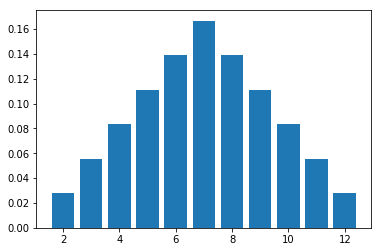

In [17]:
plt.bar(np.arange(2, len(dice_pr(6)) + 2), dice_pr(6))

b)

In [13]:
def expectation(f):
    exp = 0
    i = 2
    for x in range (0, f*2 - 1):
        exp = exp + (dice_pr(f)[x])*i
        i += 1
    return exp

In [19]:
expectation(30)

31.000000000000004

100 dice: prob. distribution, mean and standard deviation

In [61]:
trials = np.random.choice(np.arange(1,7), size=1000) + np.random.choice([0,6], size=1000)

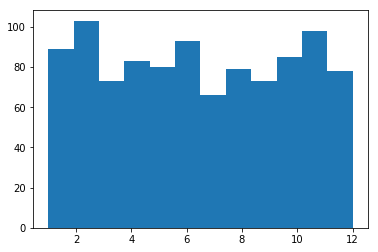

In [62]:
plt.hist(trials, bins=12)
plt.show()

# Ex. 2.21

In [100]:
p = [0.1, 0.2, 0.7]
f = [10, 5, 10/7]
exp = 0
for x in range(3):
    exp += p[x]*f[x]
print(exp)

3.0


In [10]:
exp_2 = 0
for x in range(3):
    exp_2 += p[x]*(1/p[x])
print(exp_2)

NameError: name 'p' is not defined